In [2]:
import pickle
from struct import unpack
import gzip
import numpy as np

from RBM import RBM

#Dataset
f = gzip.open("../data/mnist.pkl.gz", "rb")
data = pickle.load(f,encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data
#x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
# x = x_train[0].reshape(1,784)


"""Training of Restricted Boltzmann Machine"""

model = RBM(n_visible=28*28, n_hidden=144, lr=0.1, l2_coeff=1e-4, momentum_coff=0.5)

training_epochs = 5
batch_size = 1
for epoch in range(training_epochs):
    # index = 0
    img_num = 20000
    cost = 0
    for i in range(img_num):
        x = x_train[i].reshape(1,784)
        cost += model.const_divergence(x/255.0, K=5)

    cost = cost/img_num
    print('Training epoch %d, cost is ' % epoch, cost)

Training epoch 0, cost is  0.09368609708692513
Training epoch 1, cost is  0.08767416487801913
Training epoch 2, cost is  0.08692103485318146
Training epoch 3, cost is  0.08633438819784586
Training epoch 4, cost is  0.08592228968681843


In [20]:
"""Plotting and Testing of Restricted Boltzmann Machine"""
number = 150
visible = x_train[number].reshape(1,784)
prob_h_given_v, h_sample = model.sample_h_given_v(visible)
prob_v_given_hk, v_sample_k = model.sample_v_given_h(h_sample)
#x = v_sample_k.reshape(28,28)
x = prob_v_given_hk.reshape(28,28)

def img_frombytes(data):
    size = data.shape[::-1]
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=size, data=databytes)

# from PIL import Image
# img1 = Image.fromarray(x_train[number])
# img1.save("train.png")

# img = img_frombytes(x)
# img.save('my.png')
# img.show()

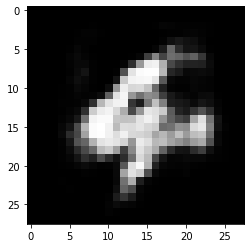

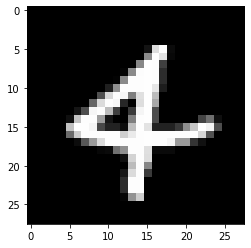

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x,cmap="gray")
plt.show()
plt.imshow(x_train[number], cmap="gray")
plt.show()

In [28]:
rbm_weight = open(b"model/rbm_weight.npy","wb")
pickle.dump(model.weight,rbm_weight)

rbm_v_bias = open(b"model/rbm_v_bias.npy","wb")
pickle.dump(model.v_bias,rbm_v_bias)

rbm_h_bias = open(b"model/rbm_h_bias.npy","wb")
pickle.dump(model.h_bias,rbm_h_bias)

In [31]:
model_test = RBM(n_visible=28*28, n_hidden=144, lr=0.1, l2_coeff=1e-4, momentum_coff=0.5)


rbm_weight_file = open("model/rbm_weight.npy",'rb')
model_test.weight = pickle.load(rbm_weight_file)

rbm_v_bias_file = open("model/rbm_v_bias.npy",'rb')
model_test.v_bias = pickle.load(rbm_v_bias_file)

rbm_h_bias_file = open("model/rbm_h_bias.npy",'rb')
model_test.h_bias = pickle.load(rbm_h_bias_file)

In [32]:
"""Plotting and Testing of Restricted Boltzmann Machine"""
number = 150
visible = x_train[number].reshape(1,784)
prob_h_given_v, h_sample = model_test.sample_h_given_v(visible)
prob_v_given_hk, v_sample_k = model_test.sample_v_given_h(h_sample)
#x = v_sample_k.reshape(28,28)
x = prob_v_given_hk.reshape(28,28)

def img_frombytes(data):
    size = data.shape[::-1]
    databytes = np.packbits(data, axis=1)
    return Image.frombytes(mode='1', size=size, data=databytes)

# from PIL import Image
# img1 = Image.fromarray(x_train[number])
# img1.save("train.png")

# img = img_frombytes(x)
# img.save('my.png')
# img.show()

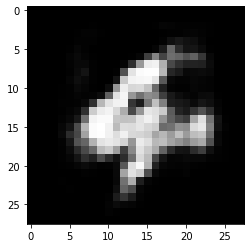

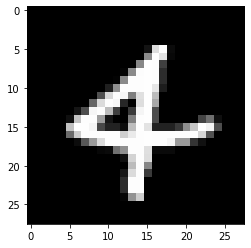

In [33]:
import matplotlib.pyplot as plt
plt.imshow(x,cmap="gray")
plt.show()
plt.imshow(x_train[number], cmap="gray")
plt.show()